In [31]:
# Import necessary modules
import pandas as pd
from datetime import datetime as dt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [17]:
# Homes contains data on home sales, zipcodes is for encoding cities later
homes = pd.read_csv('data/kc_house_data.csv')
zipcodes = pd.read_csv('data/zips.csv')

# Columns suggested to drop by project description
cols_to_drop = (['id','date','sqft_above','sqft_basement',
                'lat','long','sqft_living15','sqft_lot15'])
homes = homes.drop(cols_to_drop,axis=1)

# Exchange the zipcode column for a city column based on zipcode
homes = homes.merge(zipcodes,how='left',on='zipcode').drop('zipcode',axis=1)
#homes.info()

In [18]:
homes.loc[homes.bedrooms > 20,'bedrooms'] = 3

In [19]:
waterfront_rule = {'NO':0,'YES':1}
waterfronts = homes.waterfront.fillna('NO').map(waterfront_rule)
homes.waterfront = waterfronts

In [20]:
view_rule = {'NONE':0,'FAIR':1,'AVERAGE':2,'GOOD':3,'EXCELLENT':4}
views = homes.view.fillna('NONE').map(view_rule)
homes.view = views

In [21]:
condition_rule = {'Poor':0,'Fair':1,'Average':2,'Good':3,'Very Good':4}
conditions = homes.condition.map(condition_rule)
homes.condition = conditions

In [22]:
grades = homes.grade.apply(lambda x: int(x.split()[0]))
homes.grade = grades

In [23]:
homes.yr_renovated.fillna(0,inplace=True)
def since_reno(home):
    if home.yr_renovated < home.yr_built:
        return dt.today().year - home.yr_built
    else:
        return dt.today().year - home.yr_renovated
homes['since_reno'] = homes.apply(lambda x:since_reno(x),axis=1)
homes.drop('yr_renovated',inplace=True,axis=1)

In [24]:
homes['age'] = dt.today().year - homes['yr_built']
homes.drop('yr_built',inplace=True,axis=1)

In [25]:
cities = pd.get_dummies(homes.city,prefix='city',sparse=False,drop_first=True)
homes.drop('city',inplace=True,axis=1)

In [26]:
homes = pd.concat([homes,cities],axis=1)
homes = sm.add_constant(homes)
X = homes.drop('price',axis=1)
y = homes.price

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=271828)

In [27]:
regressor = LinearRegression().fit(X_train,y_train)
print(regressor.score(X_train,y_train))
print(regressor.score(X_test,y_test))

0.7277558032321243
0.7619816269525088


In [28]:
cv_regressor = LinearRegression()
cross_validate(cv_regressor,X_train,y_train)['test_score']

array([0.74265208, 0.72386329, 0.72707178, 0.70938234, 0.71854113])

In [29]:
sm_regressor = sm.OLS(y_train,X_train).fit()
sm_regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     1271.
Date:                Fri, 18 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:49:48   Log-Likelihood:            -2.2016e+05
No. Observations:               16197   AIC:                         4.404e+05
Df Residuals:                   16162   BIC:                         4.407e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -8.996e+05    1.9e+04    -47.445      0.000   -9.37e+05   -8.62e+05
bedrooms           -4.094e+04   2221.791    -18.427      0.000   -4.53e+04   -3.66e+04
bathrooms           3.622e+04   3604.616     10.048      0.000    2.92e+04    4.33e+04
sqft_living          175.8060      3.478     50.552      0.000     168.989     182.623
sqft_lot               0.0494      0.039      1.260      0.208      -0.027       0.126
floors              3.079e+04   3681.201      8.365      0.000    2.36e+04     3.8e+04
waterfront          6.048e+05   2.02e+04     29.897      0.000    5.65e+05    6.44e+05
view                4.337e+04   2316.014     18.728      0.000    3.88e+04    4.79e+04
condition           2.313e+04   2631.393      8.790      0.000     1.8e+04    2.83e+04
grade               9.653e+04   2315.659     41.684      0.000     9.2e+04    1.01e+05
since_reno          -617.0722    144.977     -4.256      0.000    -901.244    -332.901
age                 2979.8849    142.175     20.959      0.000    2701.207    3258.563
city_Bellevue       3.477e+05   9719.427     35.772      0.000    3.29e+05    3.67e+05
city_Black_Diamond  7.877e+04   2.34e+04      3.372      0.001     3.3e+04    1.25e+05
city_Bothell        1.118e+05   1.73e+04      6.457      0.000    7.79e+04    1.46e+05
city_Carnation      1.057e+05   2.17e+04      4.868      0.000    6.31e+04    1.48e+05
city_Duvall         8.943e+04   1.78e+04      5.033      0.000    5.46e+04    1.24e+05
city_Enumclaw      -1211.2094   1.67e+04     -0.072      0.942    -3.4e+04    3.16e+04
city_Fall_City      1.589e+05   2.71e+04      5.855      0.000    1.06e+05    2.12e+05
city_Federal_Way   -3.196e+04   1.08e+04     -2.947      0.003   -5.32e+04   -1.07e+04
city_Issaquah       1.523e+05   1.13e+04     13.493      0.000     1.3e+05    1.74e+05
city_Kenmore        1.146e+05   1.58e+04      7.272      0.000    8.37e+04    1.45e+05
city_Kent           1.234e+04   9808.238      1.258      0.208   -6885.950    3.16e+04
city_Kirkland       2.556e+05   1.04e+04     24.535      0.000    2.35e+05    2.76e+05
city_Maple_Valley   3.752e+04   1.19e+04      3.164      0.002    1.43e+04    6.08e+04
city_Medina         1.223e+06   3.29e+04     37.112      0.000    1.16e+06    1.29e+06
city_Mercer_Island  4.479e+05   1.54e+04     29.141      0.000    4.18e+05    4.78e+05
city_North_Bend     9.414e+04   1.69e+04      5.564      0.000     6.1e+04    1.27e+05
city_Redmond        2.042e+05   1.04e+04     19.596      0.000    1.84e+05    2.25e+05
city_Renton         6.651e+04   9291.104      7.159      0.000    4.83e+04    8.47e+04
city_Sammamish       1.43e+05   1.11e+04     12.861      0.000    1.21e+05    1.65e+05
city_Seattle        1.931e+05   8077.243     23.912      0.000    1.77e+05    2.09e+05
city_Snoqualmie     9.607e+04    1.5e+

<ipython-input-37-dededbed7baf>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks()/1000000);
<ipython-input-37-dededbed7baf>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks()/1000000);


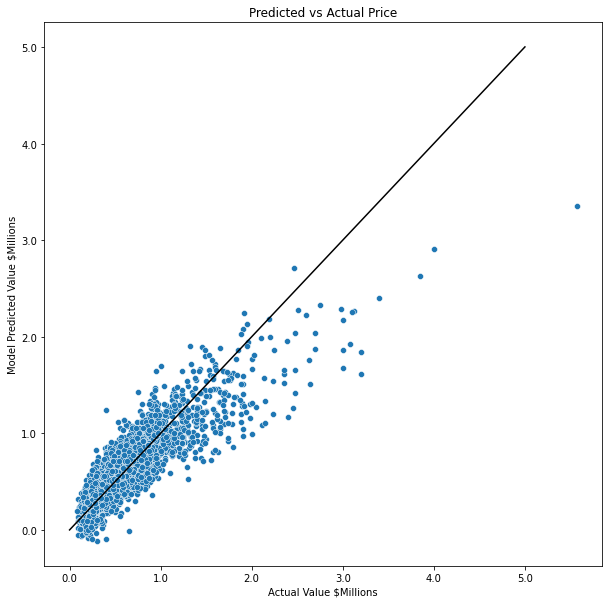

In [37]:
pred = regressor.predict(X_test)
fig,ax = plt.subplots(figsize=(10,10))
ax = sns.scatterplot(x = y_test,y = pred)
y_x = np.linspace(0,5000000,100)
ax.plot(y_x,y_x,color='k'); # Plots y=x
ax.set_title('Predicted vs Actual Price');
ax.set_ylabel('Model Predicted Value $Millions');
ax.set_xlabel('Actual Value $Millions');
ax.set_xticklabels(ax.get_xticks()/1000000);
ax.set_yticklabels(ax.get_yticks()/1000000);